# Importing necessary libraries

In [1]:
#'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

#'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

#'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as py
init_notebook_mode(connected=True)


#'''NLP - WordCloud'''
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import os
%pylab inline

from PIL import Image

Populating the interactive namespace from numpy and matplotlib


/Users/liuchen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



# Reading data

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Summary of Dataset

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 6234
Columns  : 12

Features :
     : ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Missing values    : 3036

Unique values :  
 show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64


# Finding NaNs

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

# Data Visualization

In [6]:
labels = df['type'].value_counts().index
values = df['type'].value_counts()
colors = ['pink', 'lightblue']


trace = go.Pie(labels=labels, values=values,title = 'Distribution of types',marker = dict(colors = colors), pull=[0.05, 0],textinfo='percent+label' )

iplot([trace])

In [7]:
top_10 = df['country'].value_counts()[:10]
labels = top_10.index
values = top_10

trace = go.Pie(labels=labels, values=values, title = 'Distribution of Countries',textinfo='percent+label')

iplot([trace])

In [8]:
top_15 = df['listed_in'].value_counts()[:15]
labels = top_15.index
values = top_15

trace = go.Pie(labels=labels, values=values, title = 'Distribution of Countries',textinfo='percent')

iplot([trace])

In [9]:
xmovie = df[df['type'] == 'Movie']
xtv = df[df['type'] == 'TV Show']


In [10]:
trace1 = go.Histogram(
    x=xmovie['release_year'],
    opacity=0.75,
    name = "Movie",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xtv['release_year'],
    opacity=0.75,
    name = "TV Show",
    marker=dict(color='rgb(215,48,39)'))

data = [trace1, trace2]
layout = go.Layout(barmode='stack',
                   title='Number of shows released per year',
                   xaxis=dict(title='Years'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Observation:
    If we zoom in, we can see, starting from 2019, Netflix has increasingly focusing on TV rather than movies.
    
    Unfortunately, there's a huge drop due to Covid-19 in 2020, but still TV Show dominant the market, which has released 19 programs, whereas Movie only has 6.

<AxesSubplot:xlabel='rating', ylabel='count'>

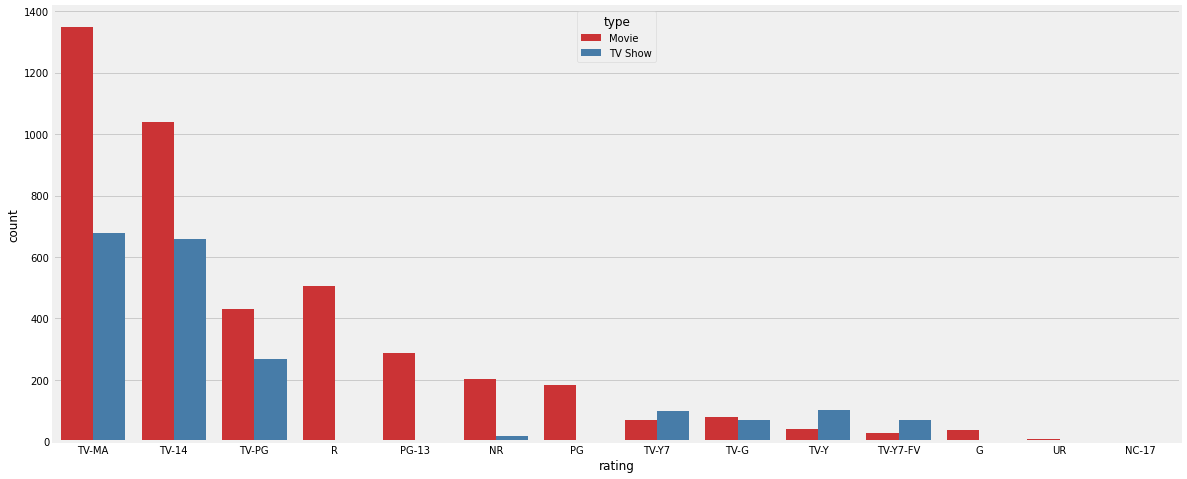

In [11]:
plt.rcParams['figure.figsize'] = (18,8)
sns.countplot(x = 'rating', data = df, order = df['rating'].value_counts()[:15].index, hue = 'type',palette="Set1")


Text(0.5, 1.0, 'Year wise analysis')

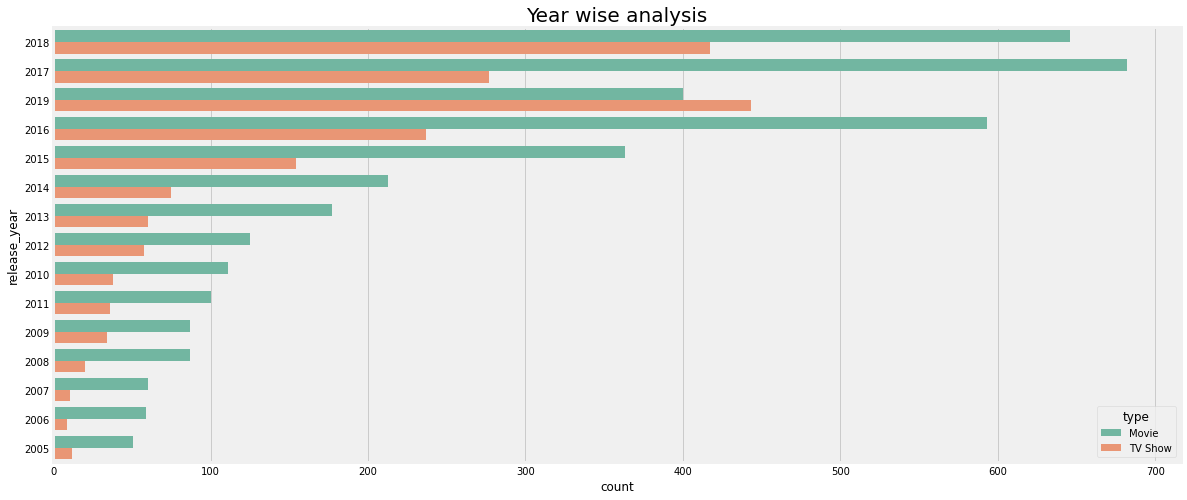

In [12]:
plt.rcParams['figure.figsize'] = (18,8)
sns.countplot(y = 'release_year', data = df, order = df['release_year'].value_counts()[:15].index, hue = 'type', palette="Set2")
plt.title('Year wise analysis', fontsize = '20')

Text(0.5, 1.0, 'Top 10 Countries wise analysis')

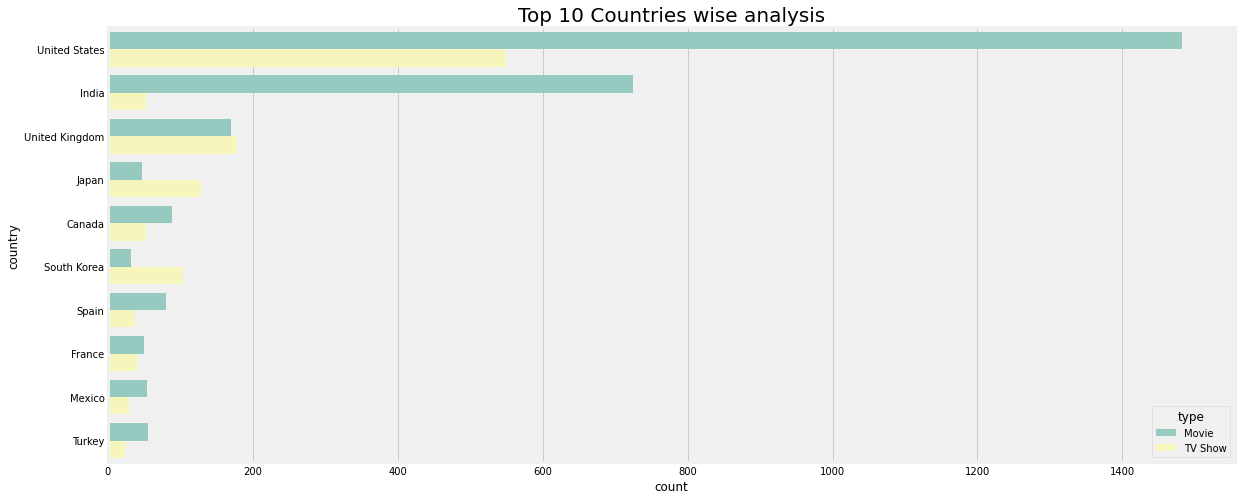

In [13]:
plt.rcParams['figure.figsize'] = (18,8)
sns.countplot(y = 'country', data = df, order = df['country'].value_counts()[:10].index, hue = 'type', palette="Set3")
plt.title('Top 10 Countries wise analysis', fontsize = '20')

Text(0.5, 1.0, 'Duration wise analysis')

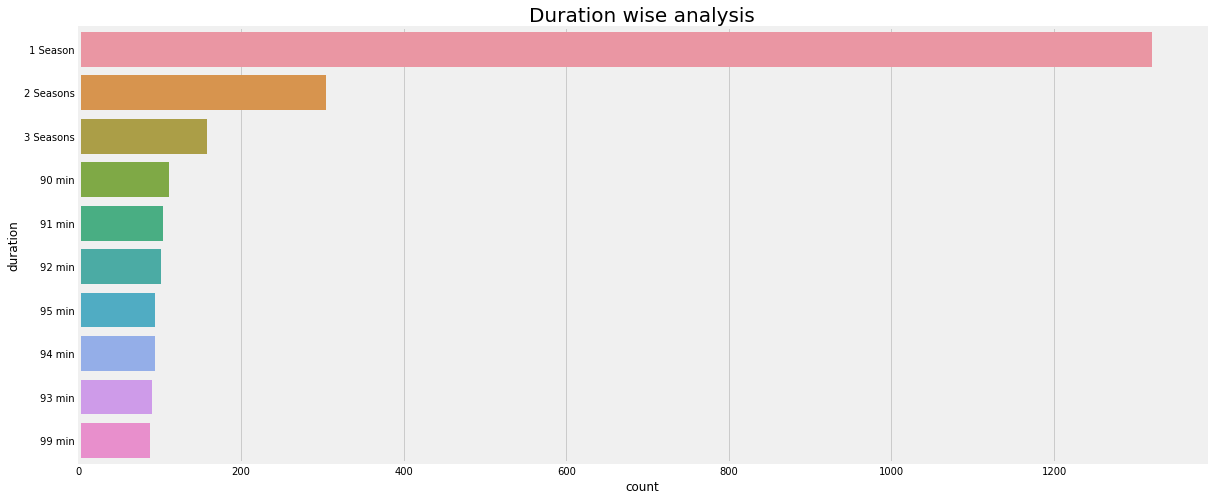

In [14]:
plt.rcParams['figure.figsize'] = (18,8)
sns.countplot(y = 'duration', data = df, order = df['duration'].value_counts()[:10].index)
plt.title('Duration wise analysis',fontsize = 20)

# Directors in different countries

In [15]:
#netflix_fr=df[df['country']=='China']
cleaned=df.dropna()
import plotly.express as px
fig = px.treemap(cleaned, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

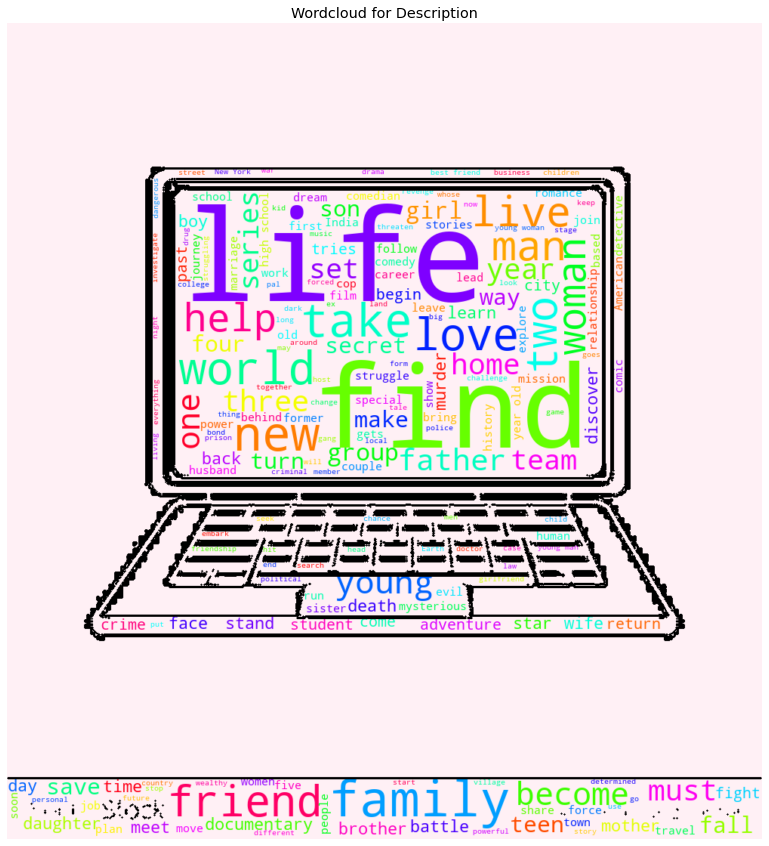

In [16]:
wave_mask= np.array(Image.open("laptop-pc-portable-in-black-and-white-vector-24598028.jpg"))
stopwords = set(STOPWORDS)
stopwords.update(["II", "III"])
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(mask=wave_mask,background_color="lavenderblush",colormap="hsv" ,contour_width=2, contour_color="black",
                      width=950,stopwords=stopwords,
                          height=950
                         ).generate(" ".join(df.description))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.savefig('graph.png')
plt.title('Wordcloud for Description')
plt.show()

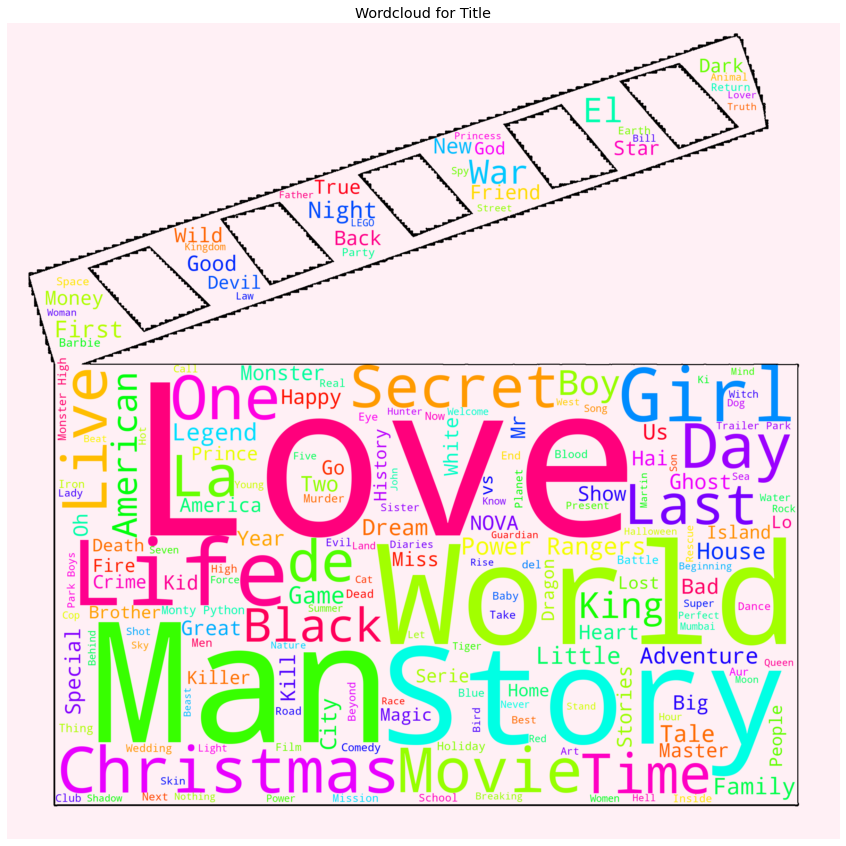

In [17]:
wave_mask= np.array(Image.open("clapper-board-refixed.jpg"))
stopwords = set(STOPWORDS)
stopwords.update(["II", "III"])
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(mask=wave_mask,background_color="lavenderblush",colormap="hsv" ,contour_width=2, contour_color="black",
                      width=950,stopwords=stopwords,
                          height=950
                         ).generate(" ".join(df.title))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.savefig('graph.png')
plt.title('Wordcloud for Title')
plt.show()

In [18]:
trace1 = go.Scatter(
                    x = df.country,
                    y = df['listed_in'][:100],
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= df.title)


data = [trace1]
layout = dict(title = 'Countries - List - Title',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'List',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

In [19]:
trace = go.Scatter3d(
    x = df.director,
    y = df.title,
    z = df.release_year,
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = df.release_year,
         colorscale = "Rainbow",
         line=dict(color='rgb(140, 140, 170)')

    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholestrol vs Heart Rate vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Director'),
            yaxis = dict(title  = 'Title'),
            zaxis = dict(title  = 'Release_Year')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)